In [1]:
library(GLMsData)
data(ruminant)

In [2]:
str(ruminant)

'data.frame':	36 obs. of  3 variables:
 $ DryMatterDigest: num  30.5 63 62.8 50 60.3 64.1 63.7 63.4 65.4 68.1 ...
 $ EnergyDigest   : num  27.8 61.5 60.4 49.5 58.7 63 62.8 62.8 64.2 66.5 ...
 $ Energy         : num  1.24 2.75 2.7 2.21 2.68 ...


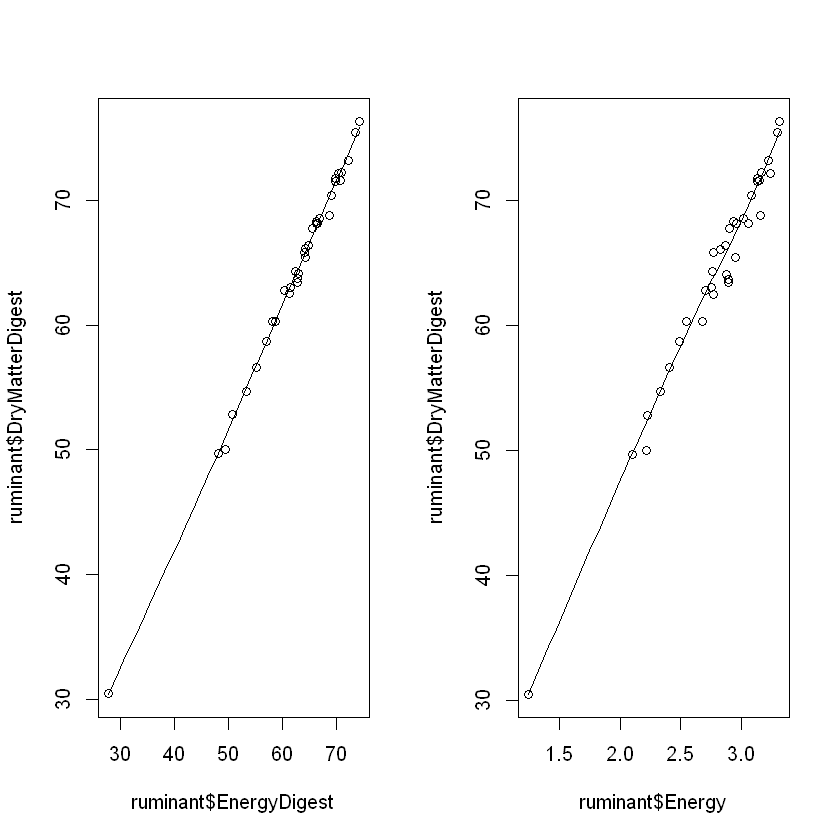

In [4]:
par(mfrow=c(1, 2))
scatter.smooth(ruminant$DryMatterDigest ~ ruminant$EnergyDigest)
scatter.smooth(ruminant$DryMatterDigest ~ ruminant$Energy)

In [5]:
cor(ruminant)

,DryMatterDigest,EnergyDigest,Energy
DryMatterDigest,1.0000000,0.9982228,0.9891837
EnergyDigest,0.9982228,1.0000000,0.9937236
Energy,0.9891837,0.9937236,1.0000000


In [6]:
lm.1 <- lm(EnergyDigest ~ DryMatterDigest, data=ruminant)

In [8]:
coef(summary(lm.1))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-2.290243,0.66703153,-3.433485,1.585028e-03
DryMatterDigest,1.011075,0.01035172,97.672160,3.093183e-43


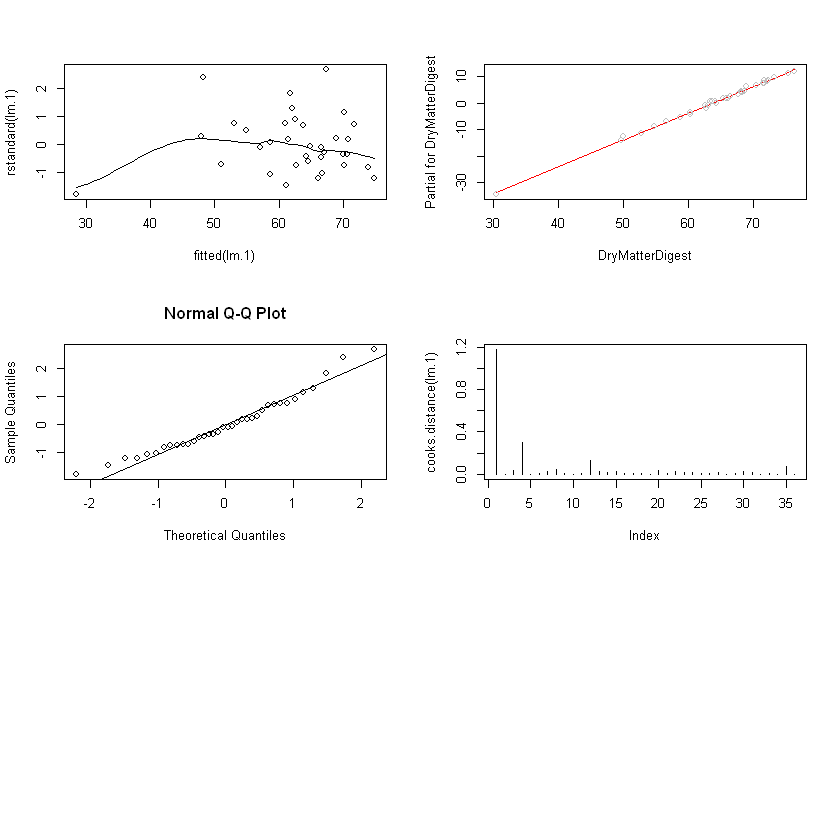

In [10]:
par(mfrow=c(3, 2))
scatter.smooth(rstandard(lm.1) ~ fitted(lm.1))
termplot(lm.1, partial.resid = TRUE, terms="DryMatterDigest")
qqnorm(rstandard(lm.1))
qqline(rstandard(lm.1))
plot(cooks.distance(lm.1), type="h")

In [11]:
max_id <- which.max(cooks.distance(lm.1))
max_id

1 
1

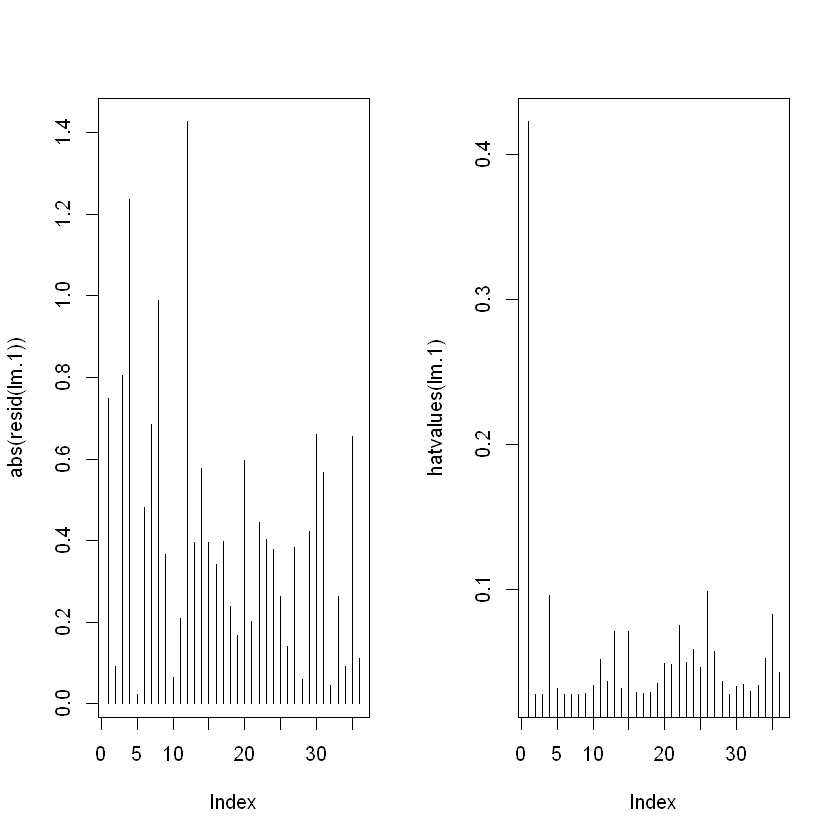

In [15]:
par(mfrow=c(1, 2))
plot(abs(resid(lm.1)), type="h")
plot(hatvalues(lm.1), type="h")